In [14]:
from typing import Optional

import torch
import pytorch_lightning as pl
from omegaconf import DictConfig
from pathlib import Path

from pytorch_lightning.utilities.types import TRAIN_DATALOADERS, EVAL_DATALOADERS
from torch.utils.data import Dataset, DataLoader
import torchvision


class CVDataModule(pl.LightningDataModule):
    def __init__(self, model_cfg: DictConfig, dataset_name: str, **kwargs):
        super(CVDataModule, self).__init__(**kwargs)
        self.model_cfg = model_cfg
        self.dataset_name = dataset_name

    def dataset_cls(self):
        if self.dataset_name == "cifar10":
            return CIFAR10

    def setup(self, stage: Optional[str] = None) -> None:
        dataset = self.dataset_cls()
        if stage == "fit" or stage is None:
            self.train_set = dataset("train")
            self.val_set = dataset("test")
        if stage == "test":
            self.test_set = dataset("test")

    def train_dataloader(self) -> TRAIN_DATALOADERS:
        return DataLoader(self.train_set, shuffle=True, **self.model_cfg["loader"])

    def val_dataloader(self) -> EVAL_DATALOADERS:
        return DataLoader(self.val_set, shuffle=False, **self.model_cfg["loader"])

    def test_dataloader(self) -> EVAL_DATALOADERS:
        return DataLoader(self.test_set, shuffle=False, **self.model_cfg["loader"])


class CIFAR10(Dataset):
    def __init__(self, mode: str, **kwargs):
        super(CIFAR10, self).__init__(**kwargs)
        self.data = self.dataperpared(mode)

    def dataperpared(self, mode: str):
        transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
        if mode == "train":
            mode = True
        else:
            mode = False
        return torchvision.datasets.CIFAR10(root="/home/kaggle/competitions", train=mode,
                                            download=False, transform=transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, item):
        sample = self.data[item]
        return {
            "image": sample[0],
            "label": sample[1]
        }


def plt(sample):
    import matplotlib.pyplot as plt
    plt.imshow(sample["image"].squeeze(0).permute(1, 2, 0).numpy())
    plt.show()





In [15]:
from omegaconf import OmegaConf
model_cfg = OmegaConf.load("../configs/model.yml")
model_cfg


{'loader': {'batch_size': 1, 'num_workers': 4}}

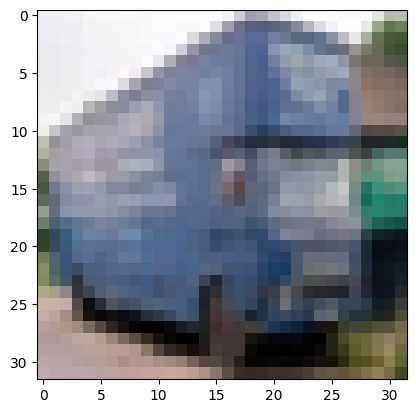

{'image': tensor([[[[0.9333, 0.9333, 0.9412,  ..., 0.8784, 0.7098, 0.7216],
           [0.9294, 0.9294, 0.9333,  ..., 0.5882, 0.3922, 0.4314],
           [0.9216, 0.9216, 0.9294,  ..., 0.3922, 0.2824, 0.2549],
           ...,
           [0.7059, 0.7020, 0.6980,  ..., 0.5216, 0.5882, 0.4314],
           [0.7294, 0.7216, 0.7137,  ..., 0.4157, 0.5294, 0.3804],
           [0.7490, 0.7294, 0.7294,  ..., 0.5608, 0.4627, 0.2863]],
 
          [[0.9294, 0.9294, 0.9373,  ..., 0.9020, 0.7373, 0.7451],
           [0.9255, 0.9255, 0.9294,  ..., 0.6471, 0.4627, 0.5098],
           [0.9176, 0.9176, 0.9255,  ..., 0.4471, 0.3569, 0.3451],
           ...,
           [0.6314, 0.6275, 0.6235,  ..., 0.4745, 0.5451, 0.4118],
           [0.6549, 0.6471, 0.6431,  ..., 0.3765, 0.5020, 0.3961],
           [0.6745, 0.6549, 0.6549,  ..., 0.5059, 0.4196, 0.2824]],
 
          [[0.9529, 0.9529, 0.9569,  ..., 0.8588, 0.6706, 0.6863],
           [0.9490, 0.9490, 0.9490,  ..., 0.5490, 0.3294, 0.3765],
           [0.9

In [18]:

from omegaconf import OmegaConf
model_cfg = OmegaConf.load("../configs/model.yml")
dm = CVDataModule(model_cfg, "cifar10")
dm.setup("fit")
dataloader = dm.train_dataloader()
itera = iter(dataloader).next()
plt(itera)
itera